<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#ggraph" data-toc-modified-id="ggraph-5">ggraph</a></span></li><li><span><a href="#covid-acute-vs-healthy-(test)" data-toc-modified-id="covid-acute-vs-healthy-(test)-6">covid acute vs healthy (test)</a></span></li><li><span><a href="#SS" data-toc-modified-id="SS-7">SS</a></span></li><li><span><a href="#CHOP-samples" data-toc-modified-id="CHOP-samples-8">CHOP samples</a></span></li></ul></div>

# Dependencies

In [1]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr)

# Functions

In [2]:
#source("/Users/anabbi/git/ped_CapTCRseq/R/Immune_diversity.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/"

# Main

In [5]:
load(file = paste0(datapath, "capTCRseq/gliph_int_covid_tcr.RData"))

In [6]:
gliphoutput <- read.csv(paste0(h4hpath,'/GLIPH/int_covid_tcr_cluster.csv'), header = T)

Warning message in file(file, "rt"):
“cannot open file '/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq//GLIPH/int_covid_tcr_cluster.csv': Input/output error”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
dim(gliphoutput)

In [8]:
head(gliph_int_covid_tcr)

,CDR3b,TRBV,TRBJ,CDR3a,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CAIRDPEQGITDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:1,24,0.025369979,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,1
2,CAIRGTGADQPQHF,TRBV10-3,TRBJ1-5,NA,CHP_315:2,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,2
3,CAISGVWGGDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:3,12,0.012684989,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,3
4,CASRLAGTGSPLHF,TRBV6-1,TRBJ1-6,NA,CHP_315:4,2,0.002114165,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,4
5,CASSDPQGTEAFF,TRBV6-2,TRBJ1-1,NA,CHP_315:5,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,5
6,CASSEEPGTSGYNEQFF,TRBV2,TRBJ2-1,NA,CHP_315:6,6,0.006342495,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,6


# ggraph

map back to the original data

In [9]:
gliph_all <- merge(gliph_int_covid_tcr, gliphoutput, 
                   by.x = "subject:condition", by.y = "Sample", all = T)

In [10]:
dim(gliphoutput)

[1] 301942     29

In [11]:
#remove HLA cols they are empty
HLAcol <- colnames(gliph_all)[!grepl("HLA", colnames(gliph_all))]
gliph_all <- gliph_all[, ..HLAcol]

In [12]:
colnames(gliph_all)

[1] "subject:condition"  "CDR3b"              "TRBV"              
 [4] "TRBJ"               "CDR3a"              "count"             
 [7] "clonefraction"      "subject"            "file"              
[10] "index.x"            "index.y"            "pattern"           
[13] "Fisher_score"       "number_subject"     "number_unique_cdr3"
[16] "final_score"        "hla_score"          "vb_score"          
[19] "expansion_score"    "length_score"       "cluster_size_score"
[22] "type"               "TcRb"               "V"                 
[25] "J"                  "TcRa"               "Freq"

# covid acute vs healthy (test)

In [111]:
gliph_covid <- gliph_all[grepl(paste(c("eJL158", "eXL36"), #1 COVID+, 1 Healthy
                                       collapse = "|"), gliph_all$`subject:condition`),]

In [112]:
#if pattern is NA = not clustered
gliph_covid$pattern[ is.na(gliph_covid$pattern)] <- "Not clustered"

In [113]:
# just to consider those cdr3s with the same sequence but different VJ
gliph_covid$CDR3_VJ <- paste(gliph_covid$CDR3b, gliph_covid$TRBV, gliph_covid$TRBJ, sep = "_")

In [114]:
#if subject contains more than one sample == public
gliph_covid$subject[ grepl(",", gliph_covid$subject)] <- "public"

In [115]:
#remove Not clustered to create an edge list
gliph_covid_clustered <- gliph_covid[ gliph_covid$pattern != "Not clustered",]

In [116]:
colnames(gliph_covid_clustered)

[1] "subject:condition"  "CDR3b"              "TRBV"              
 [4] "TRBJ"               "CDR3a"              "count"             
 [7] "clonefraction"      "subject"            "file"              
[10] "index.x"            "index.y"            "pattern"           
[13] "Fisher_score"       "number_subject"     "number_unique_cdr3"
[16] "final_score"        "hla_score"          "vb_score"          
[19] "expansion_score"    "length_score"       "cluster_size_score"
[22] "type"               "TcRb"               "V"                 
[25] "J"                  "TcRa"               "Freq"              
[28] "CDR3_VJ"

In [117]:
#from stackoverflow to find all combos for each pattern
edgedf <- gliph_covid_clustered %>% group_by(pattern) %>%
  filter(n()>=2) %>% do(data.frame(t(combn(.$CDR3_VJ, 2)), stringsAsFactors=FALSE)) %>% ungroup()

In [118]:
head(edgedf)

pattern,X1,X2
<chr>,<chr>,<chr>
%AANTGE,CAVGAANTGELFF_TRBV07-09_TRBJ02-02,CASGAANTGELFF_TRBV07-09_TRBJ02-02
%DANTGE,CANQDANTGELFF_TRBV06-06_TRBJ02-02,CASDDANTGELFF_TRBV07-08_TRBJ02-02
%DLNTGE,CATGDLNTGELFF_TRBV15-01_TRBJ02-02,CATQDLNTGELFF_TRBV06-X_TRBJ02-02
%DLNTGE,CATGDLNTGELFF_TRBV15-01_TRBJ02-02,CARADLNTGELFF_TRBV07-08_TRBJ02-02
%DLNTGE,CATQDLNTGELFF_TRBV06-X_TRBJ02-02,CARADLNTGELFF_TRBV07-08_TRBJ02-02
%DQNTGE,CAISDQNTGELFF_TRBV12-03/12-04_TRBJ02-02,CATQDQNTGELFF_TRBV06-04_TRBJ02-02


In [119]:
#create vertex list
vertexdf <- gliph_covid[,c("CDR3_VJ", "count", "subject")]
vertexdf <- vertexdf[!duplicated(vertexdf$CDR3_VJ),]

In [120]:
gliph_data_igrf <- graph_from_data_frame(d = edgedf[, c("X1", "X2", "pattern")], 
                                         vertices = vertexdf, directed = FALSE)

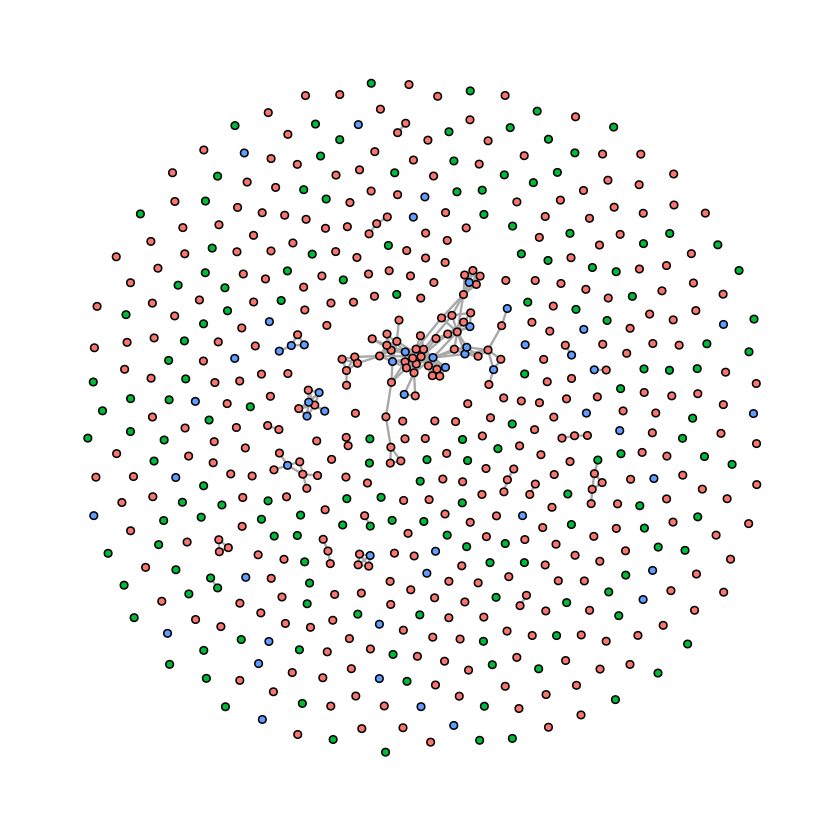

In [121]:
set.seed(1)
ggraph(gliph_data_igrf, layout = "graphopt") + #graphopt, fr, mds
  geom_edge_link0(edge_colour = "grey66") +
  geom_node_point(aes(fill = subject), shape = 21) +
#  geom_node_text(aes(filter = size >= 26, label = name), family = "serif") +
#  scale_fill_manual() +
#  scale_edge_width(range = c(0.2, 3)) +
#  scale_size(range = c(1, 6)) +
  theme_graph() +
  theme(legend.position = "none")

In [122]:
gliph_data_igrf1 <- delete.vertices(gliph_data_igrf, which(degree(gliph_data_igrf) == 0))

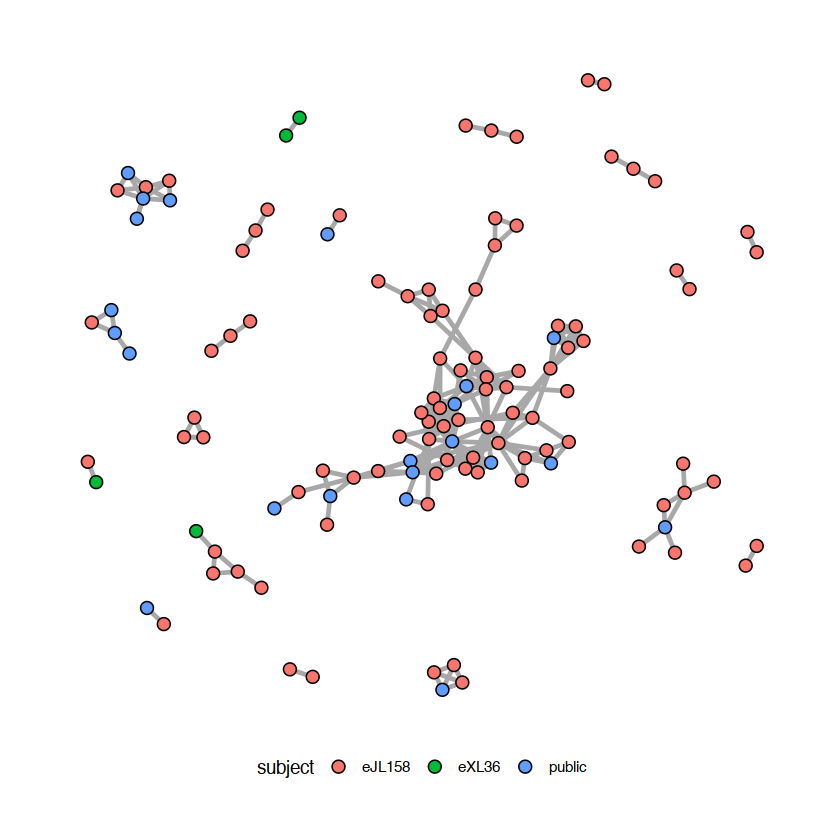

In [127]:
set.seed(1)
ggraph(gliph_data_igrf1, layout = "graphopt") + #graphopt, fr, mds
  geom_edge_link0(edge_colour = "grey66", width = 1) +
  geom_node_point(aes(fill = subject), shape = 21, size = 3) +
#  geom_node_text(aes(filter = size >= 26, label = name), family = "serif") +
#  scale_fill_manual() +
#  scale_edge_width(range = c(0.2, 3)) +
#  scale_size(range = c(1, 6)) +
  theme_graph(base_family="sans") +
  theme(legend.position = "bottom") 

# SS

In [68]:
gliph_data_matrix_df <- as.data.frame.matrix(
                table(gliph_covid %>% select(type , TcRb )))

In [102]:
head(gliph_data_matrix_df)

,CAAGHANTGELFF,CAEGGRNTGELFF,CAGGQLNTGELFF,CAGQESNTGELFF,CAGQSSNTGELFF,CAGSDQNTGELFF,CAISDQNTGELFF,CAISEGTTGNEQFF,CAMQEMNTGELFF,CANQDANTGELFF,⋯,CSGRADTQYF,CSRGSPDTQYF,CSVDFRGSGTEAFF,CSVDGGGEQYF,CSVDGTVNTEAFF,CSVDLDRNTGELFF,CSVEEGRSYNEQFF,CSVTAGGPRDEQFF,CSVTGNTEAFF,CSVVDRSSYNEQFF
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
global-%AANTGE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%ADT,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
global-%AGFNE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%AINTGE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
global-%DANTGE,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
global-%DGNTGE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [103]:
gliph_data_igrf <- igraph::graph_from_incidence_matrix (gliph_data_matrix_df )

In [104]:
V(gliph_data_igrf)$subject <- sapply(V(gliph_data_igrf)$name, function(x){
    gliph_covid$subject[match(x, gliph_covid$TcRb)]
}
                                    )

In [106]:
igraph::bipartite.projection(gliph_data_igrf)$proj2

IGRAPH 1bf98bb UNW- 353 195 -- 
+ attr: name (v/c), subject (v/c), weight (e/n)
+ edges from 1bf98bb (vertex names):
 [1] CAAGHANTGELFF--CASGAANTGELFF CAAGHANTGELFF--CATGEANTGELFF
 [3] CAAGHANTGELFF--CATGTANTGELFF CAAGHANTGELFF--CAVGAANTGELFF
 [5] CAAGHANTGELFF--CSFGLANTGELFF CAGGQLNTGELFF--CATGDLNTGELFF
 [7] CAGGQLNTGELFF--CATGELNTGELFF CAGGQLNTGELFF--CATGQMNTGELFF
 [9] CAGQESNTGELFF--CATQESNTGELFF CAGQESNTGELFF--CAGQSSNTGELFF
[11] CAGQESNTGELFF--CATQDSNTGELFF CAGQESNTGELFF--CAMQEMNTGELFF
[13] CAGQESNTGELFF--CASQEGNTGELFF CAGQESNTGELFF--CASQELNTGELFF
[15] CAGQESNTGELFF--CASQERNTGELFF CAGQESNTGELFF--CASQETNTGELFF
+ ... omitted several edges

In [99]:
is.bipartite(gliph_data_igrf)

[1] TRUE

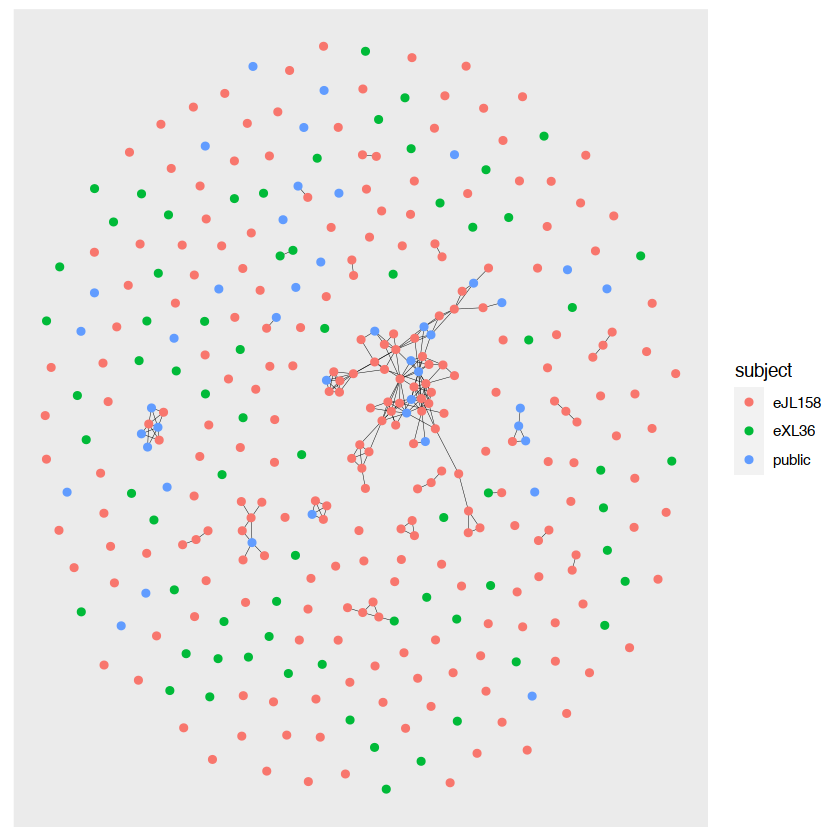

In [110]:
        ggraph(bipartite.projection(gliph_data_igrf)$proj2 , "graphopt" ) +
        geom_edge_link(
                edge_width = 0.1 ,
                edge_colour = "#000000"
        ) +
        geom_node_point(aes(color  = subject))
        

In [74]:
     V(gliph_data_igrf)$CloneCount <- 

sapply(V(gliph_data_igrf)$name, function(x){
   gliph_covid$Freq[ match(gliph_covid$TcRb == V(gliph_data_igrf)$name[i]]) 
})

        for (i in c(1:length(V(gliph_data_igrf)$CloneCount))) {
                
                if (any(gliph_covid$Freq[gliph_covid$TcRb == V(gliph_data_igrf)$name[i]])) {
                        V(gliph_data_igrf)$CloneCount[i] <- gliph_covid$Freq [gliph_covid$TcRb == V(gliph_data_igrf)$name[i]]
                        
                }
                else {
                        V(gliph_data_igrf)$CloneCount[i] <- 0
                }
        }

Warning message in any(gliph_covid$Freq[gliph_covid$TcRb == V(gliph_data_igrf)$name[i]]):
“coercing argument of type 'double' to logical”


ERROR: Error in if (any(gliph_covid$Freq[gliph_covid$TcRb == V(gliph_data_igrf)$name[i]])) {: missing value where TRUE/FALSE needed


# CHOP samples

In [13]:
gliph_chp <- gliph_all[grepl("CHP", gliph_all$`subject:condition`),]

In [14]:
#if pattern is NA = not clustered
gliph_chp$pattern[ is.na(gliph_chp$pattern)] <- "Not clustered"

In [15]:
# just to consider those cdr3s with the same sequence but different VJ
gliph_chp$CDR3_VJ <- paste(gliph_chp$CDR3b, gliph_chp$TRBV, gliph_chp$TRBJ, sep = "_")

In [16]:
#if subject contains more than one sample == public
gliph_chp$subject[ grepl(",", gliph_chp$subject)] <- "public"

In [17]:
#remove Not clustered to create an edge list
# filter
gliph_chp_clustered <- gliph_chp[ gliph_chp$pattern != "Not clustered",]
gliph_chp_clustered <- gliph_chp_clustered[ gliph_chp_clustered$pattern != "single",]
gliph_chp_clustered <- gliph_chp_clustered[ gliph_chp_clustered$number_subject >= 3,]
gliph_chp_clustered <- gliph_chp_clustered[ gliph_chp_clustered$number_unique_cdr3 >= 3,]

gliph_chp_clustered <- gliph_chp_clustered[ gliph_chp_clustered$Fisher_score < 1e-04,]

In [18]:
dim(gliph_chp_clustered)

[1] 1823   28

In [19]:
#from stackoverflow to find all combos for each pattern
edgedf <- gliph_chp_clustered %>% group_by(pattern) %>%
  filter(n()>=2) %>% do(data.frame(t(combn(.$CDR3_VJ, 2)), stringsAsFactors=FALSE)) %>% ungroup()

In [20]:
head(edgedf)

pattern,X1,X2
<chr>,<chr>,<chr>
%DGNTGE,CASGDGNTGELFF_TRBV7-9_TRBJ2-2,CASIDGNTGELFF_TRBV19_TRBJ2-2
%DGNTGE,CASGDGNTGELFF_TRBV7-9_TRBJ2-2,CASSDGNTGELFF_TRBV6-4_TRBJ2-2
%DGNTGE,CASGDGNTGELFF_TRBV7-9_TRBJ2-2,CASSDGNTGELFF_TRBV6-4_TRBJ2-2
%DGNTGE,CASIDGNTGELFF_TRBV19_TRBJ2-2,CASSDGNTGELFF_TRBV6-4_TRBJ2-2
%DGNTGE,CASIDGNTGELFF_TRBV19_TRBJ2-2,CASSDGNTGELFF_TRBV6-4_TRBJ2-2
%DGNTGE,CASSDGNTGELFF_TRBV6-4_TRBJ2-2,CASSDGNTGELFF_TRBV6-4_TRBJ2-2


In [21]:
#create vertex list
vertexdf <- gliph_chp_clustered[,c("CDR3_VJ", "count", "subject")]
vertexdf <- vertexdf[!duplicated(vertexdf$CDR3_VJ),]

In [22]:
gliph_data_igrf <- graph_from_data_frame(d = edgedf[, c("X1", "X2", "pattern")], vertices = vertexdf, directed = FALSE)

In [23]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

In [24]:
gliph_data_igrf

IGRAPH 43a3609 UN-- 1134 26151 -- 
+ attr: name (v/c), count (v/n), subject (v/c), pattern (e/c)
+ edges from 43a3609 (vertex names):
[1] CASGDGNTGELFF_TRBV7-9_TRBJ2-2 --CASIDGNTGELFF_TRBV19_TRBJ2-2  
[2] CASGDGNTGELFF_TRBV7-9_TRBJ2-2 --CASSDGNTGELFF_TRBV6-4_TRBJ2-2 
[3] CASGDGNTGELFF_TRBV7-9_TRBJ2-2 --CASSDGNTGELFF_TRBV6-4_TRBJ2-2 
[4] CASIDGNTGELFF_TRBV19_TRBJ2-2  --CASSDGNTGELFF_TRBV6-4_TRBJ2-2 
[5] CASIDGNTGELFF_TRBV19_TRBJ2-2  --CASSDGNTGELFF_TRBV6-4_TRBJ2-2 
[6] CASSDGNTGELFF_TRBV6-4_TRBJ2-2 --CASSDGNTGELFF_TRBV6-4_TRBJ2-2 
[7] CASSDRNTGELFF_TRBV11-3_TRBJ2-2--CASSDRNTGELFF_TRBV6-4_TRBJ2-2 
[8] CASSDRNTGELFF_TRBV11-3_TRBJ2-2--CATSDRNTGELFF_TRBV24-1_TRBJ2-2
+ ... omitted several edges

In [25]:
#just to simplify a little bit
gliph_data_igrf1 <- delete.vertices(gliph_data_igrf, which(degree(gliph_data_igrf) < 50))

In [26]:
gliph_data_igrf1

IGRAPH adc0400 UN-- 190 18663 -- 
+ attr: name (v/c), count (v/n), subject (v/c), pattern (e/c)
+ edges from adc0400 (vertex names):
[1] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
[2] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
[3] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
[4] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
[5] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
[6] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
[7] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
[8] CASSDSNTGELFF_TRBV6-4_TRBJ2-2--CASSDSNTGELFF_TRBV6-4_TRBJ2-2
+ ... omitted several edges

In [51]:
V(gliph_data_igrf1)$cancer <- meta_div$Disease_type[ match(V(gliph_data_igrf1)$subject,
                                                          meta_div$basename)]

In [52]:
chp_layout <- create_layout(gliph_data_igrf1, "fr")

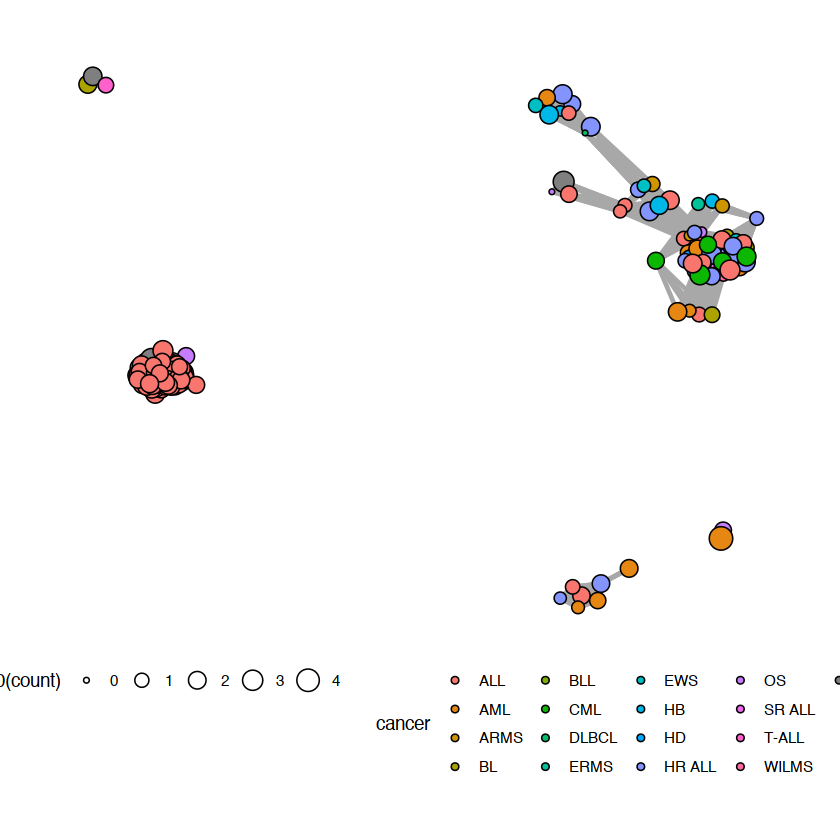

In [53]:
pdf(paste0(plotpath, "chp_graph_mds.pdf"), width = 10, height = 10)
set.seed(1)
ggraph(chp_layout) + #graphopt, fr, mds
  geom_edge_link0(edge_colour = "grey66", width = 1) +
  geom_node_point(aes(fill = cancer, size = log10(count)), shape = 21) +
#  geom_node_text(aes(filter = size >= 26, label = name), family = "serif") +
#  scale_fill_manual() +
#  scale_edge_width(range = c(0.2, 3)) +
#  scale_size(range = c(1, 6)) +
  theme_graph(base_family="sans") +
  theme(legend.position = "bottom") 

dev.off()